## IRMAK AYTEKIN - aytekini

Assignment 2: Measuring the Ages of Stellar Clusters
==============================================

## Before you begin

Assuming you have loaded this file into your Jupyter Notebooks workspace, make sure to press the "play" button at the top of the page in each box. This will render the Markdown into nicely-formatted text.

Select <span style="color:purple"> **View -> Show Line Numbers** </span> from the menu at the top to the screen. This will make line numbers appear in each of the blocks of code below. For this assignment we have added specific instuctuions such as "Edit the parameter on Line 5" to make it clear what is required. Unfortunately, you will need to check this again everytime you open this workbook, or refresh the JupyterHub.

## Introduction

This Jupyter Notebook will serve as the template the third question on Assignment 2. You will be working through the content it contains and then filling in your own work in the spaces provided. In order to complete this assignment you will require the following (all of which will be provided to you):

* The files OpenCluster1_Gaia_AST221.csv and OpenCluster2_Gaia_AST221.csv, which contain information on the position, parallax, proper motion, and brightness measurements for several hundred stars in two Milky Way open clusters from the Gaia satellite.
* A set of eight files with names of the format: isochrone_solar_[AGE].csv, where each file has a different age between 1 Myr and 5 Gyr. These are files that contain information on the expected absolute magnitudes that stars of different inital masses will have depending on their age. You will use these to determine the age of these two stellar clusters (more information on these files is provided below).

In the sections below, every individual sub-questions have been written in <span style="color:red"> Red Text </span>. Some questions require you to make edits to bits of code that we have provided, in which case we specify the specific lines you are required to edit. Other questions are short answer (paragraph) format, asking you to summarize what you learned from various portions of the activity. In cases where paragraph-stype answers are required, we have indicated where you should enter your responses in <span style="color:blue"> Blue Text.</span>

Please reach out of you have any questions.

# Phase 1: Plotting the Observed Color-Magnitude Diagrams:

We will first explore what the observed data looks like for the two open clusters. In particular, we are going to be plotting examples of the 'Color-Magnitude Diagrams'(CMDs) that were discussed first discussed in Lecture 9. These are the 'observer equivlanet' to a Hertzsprung Russell Diagram. In our case we are going to be plotting CMDs using observations in three photometric bands that are used by the Gaia satellite. We will be making plots with the Gaia_G band on the vertical axis and the Gaia_BP minus Gaia_RP color on the horizontal axis. Gaia_G is a very broad filter that collects much of the optical light from stars, while Gaia_BP is a blue filter and Gaia_RP is a red filter. 

The columns provided in the OpenCluster1_Gaia_AST221.csv and OpenCluster2_Gaia_AST221.csv files (and their units) are listed on quercus. 

#### <span style="color:red">QUESTION 3A:</span> Read in the Data Files for the Observed Cluster Data and Calculate Relevant Quantities

In question 3B you will be asked to plot a color-magnitude diagram for both stellar clusters that has the OpenCluster1_Gaia_AST221.csv and OpenCluster2_Gaia_AST221.csv. Here we are going to prepare the data that we will need to do this. 
* First, edit lines 5 and 6 below so that they read in the two csv files with the cluster data.
* Then uncomment lines 14 and 15 and add/complete any lines of code that will allow you to end up with one array (called cluster1_absoluteG) that contains the **absolute** Gaia_G band magnitudes for the cluster stars and a second array (called cluster1_BP_minus_RP) that contains the Gaia_BP minus Gaia_RP color for the cluster stars. In some cases you may simply be able to select relevant magnitude columns from the data files provided. In others you may need to use other columns in the file to perform some intermediate calculations.   
* Repeat the previous step for the cluster 2 data in the bottom part of this code block.

Note: if you aren't sure how to start here, we recommend looking at both the python tutorial documents and your response to questions 3A and 3B from assignment 1. 

In [10]:
import numpy as np
from astropy.io import ascii

# --- Read in the two data files ---
cluster1_data = ascii.read("OpenCluster1_Gaia_AST221.csv")
cluster2_data = ascii.read("OpenCluster2_Gaia_AST221.csv")

#####################################################################################
# --- Cluster 1 ---
parallax1 = cluster1_data['parallax']     # in milliarcseconds (mas)
G1 = cluster1_data['Gaia_G']              # apparent G magnitude
BP1 = cluster1_data['Gaia_BP']            # blue magnitude
RP1 = cluster1_data['Gaia_RP']            # red magnitude

# convert parallax (mas) to distance (pc)
distance1 = 1000 / parallax1

# compute absolute magnitude and color
cluster1_absoluteG = G1 - 5 * np.log10(distance1 / 10)
cluster1_BP_minus_RP = BP1 - RP1

#####################################################################################
# --- Cluster 2 ---
parallax2 = cluster2_data['parallax']
G2 = cluster2_data['Gaia_G']
BP2 = cluster2_data['Gaia_BP']
RP2 = cluster2_data['Gaia_RP']

distance2 = 1000 / parallax2
cluster2_absoluteG = G2 - 5 * np.log10(distance2 / 10)
cluster2_BP_minus_RP = BP2 - RP2


#### <span style="color:red">QUESTION 3B:</span> Plot the Gaia CMD for both clusters and label any relevant features.

If you run the code below, it will make a plot of the Gaia CMD for your cluster 1 data, using your results from question 3A. Run it. Then modify the code as follows: 
* First, uncomment lines 8 and 9. You should add two numbers between the () in each line to set the lower and upper bounds of each axis. In particular, we always plot CMDs so that the brighter stars are on the top (and fainter star on the bottom) and so that bluer/hotter stars are on the left (and redder/colder stars are on the right). Add appropriate ranges so that this convention is followed.
* Second, add three lines of code in lines 13 to 15 so that there are appropriate labels for the x and y axes (with units) and an overall title for the plot with the name of the cluster (e.g. 'Cluster 1').
* Third, add text to the plot to label any features that you can identify in the CMD. Line 18 provides example code for how to do this. Uncomment it and see what it does. Then feel free to move/copy/edit this line to add labels to your figure. If you aren't sure how to identify any features in the plot, I recommend reviewing section 13.3 of the textbook.
* Fourth, repeat the above process to make an equivalent plot for the second star cluster.


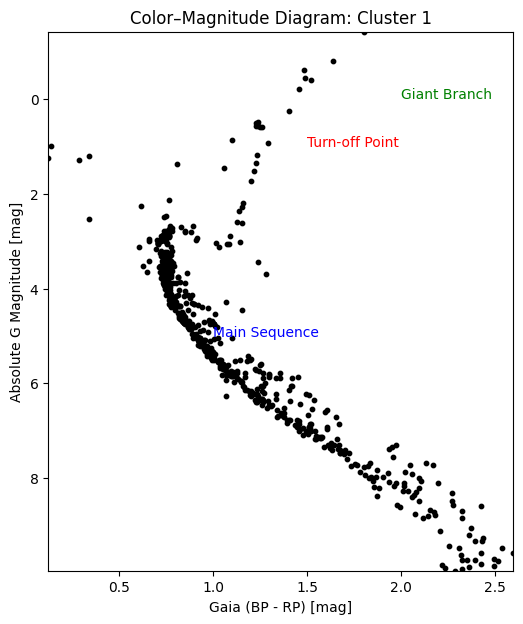

In [11]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure(figsize=(6,7))
plt.scatter(cluster1_BP_minus_RP, cluster1_absoluteG, s=10, color='black')

# --- Flip the axes so the CMD has the correct orientation ---
# brighter (smaller mag) at the top, bluer (smaller color) on the left
plt.ylim(max(cluster1_absoluteG), min(cluster1_absoluteG))
plt.xlim(min(cluster1_BP_minus_RP), max(cluster1_BP_minus_RP))

# --- Add axis labels and title ---
plt.xlabel("Gaia (BP - RP) [mag]")
plt.ylabel("Absolute G Magnitude [mag]")
plt.title("Color–Magnitude Diagram: Cluster 1")

# --- Add text labels for key features ---
# (these positions are rough — you can adjust once you see your plot)
plt.text(1.0, 5, "Main Sequence", color="blue")
plt.text(1.5, 1, "Turn-off Point", color="red")
plt.text(2.0, 0, "Giant Branch", color="green")

plt.show()


#### <span style="color:red">QUESTION 3C:</span> Discuss your Results from 3B. 

Describe in words what you see in the plots for both cluster CMDs above. Refer to the labels you added when discussing specific features and why you identified them as you did. Are there cases where you could identify certain features in one cluster and not the other? Which of the two clusters do you think is older. Clearly explain the rational for your answer.


#### <span style="color:blue">In the color–magnitude diagrams (CMDs) of both clusters, I can identify the main sequence, which appears as a well-defined diagonal band where most stars lie. Toward brighter magnitudes and bluer colors (upper-left region), the stars are hotter and more massive, while toward fainter magnitudes and redder colors (lower-right region), they are cooler and less massive. In Cluster 1, the main sequence extends farther toward the bright, blue end, and the turn-off point—where stars begin to leave the main sequence—is relatively high and blue. This indicates that the cluster still contains many high-mass, short-lived stars and is therefore younger. In Cluster 2, the turn-off occurs at a lower luminosity and redder color, and there is a more prominent red-giant branch visible above the main sequence. These features show that the most massive stars have already evolved off the main sequence, implying that Cluster 2 is older.</span>

# Phase 2: Measuring Ages with Isochrones

We will now go through the process of measuring the ages for these clusters in a slightly more quantitative way. To do this we are going to use a type of data set know as an **isochrone**. An isochrone is a set of data that describes what the properties of a set of stars with different initial masses are expected to be *at a certain snapshot in time after they were formed*. This is different from an **evolutionary track** which tells us what the properties of a star with a a specific mass are expected to be *as a function of time*. 

To construct an isochrone, you would first compute a set of evolutionary tracks for a wide range of stellar masses (e.g. 0.1 to 200 M$_\odot$) with a stellar evolution code like MESA. Then, you would choose what age of stellar population you are interested in (i.e. a young stellar population that only formed 10 Myr ago vs. and old stellar population that formed 10 Gyr ago). You would then grab the appropriate timestep from each of the (many) stellar evolution tracks to see what the properties of each star are at that snapshot in time. By 'properties' here we mean things like temperature and luminosity. Or, equivalently, the absolute magnitudes in a set of observed filters. 

For this phase of the question, we have provide you with a set of 8 isochrones. These come from the MIST project (https://waps.cfa.harvard.edu/MIST/) which constructed isochrones based on stellar evolution models run with MESA. The isochrones we have provided you with are all for stars with solar metallicity--which is appropriate for the two star clusters you are considering here. 

The names of the isochrone files are all of the form isochrone_solar_[AGE].csv, where there are 8 different ages that span 1 Myr to 5 Gyrs. The columns provided in each of these files (and their units) are listed on quercus.

#### <span style="color:red">QUESTION 3D:</span> Overplot the isochrones on you Gaia CMDs to determine their ages.

If you run the code below, it will read in the file for one of the isochrones and plot it. Run this code to see what it does. Note that by adding both the 'label' flag within the plot command and the line 'plt.legend()' that a legend now appears within the plot. You should modify this code in order to use the set of isochrones provides to determine the approximate ages for your clusters. Specifically: 

* Copy over code from question 3B, above, so that the data from cluster 1 appears on the plot along with the isochrone. You should also copy over code for the axes labels and plot title, and ensure that the CMD has bright stars on top and blue stars on the left (although you may want to increase the axes ranges from what you used above). 
* Read in some of the other isochrone data files and compare them to the observed data to determine what the approximate age for the cluster is. For the final plot in your submission you should include the three isochrones (of the 8 provided) that come closest to fitting the data for the cluster (i.e. the 'best' option in your opinion along with  the isochrone that is next younger and next older amonst those provided). The three isochrones should all be plotted in different colors and labeled in the legend according to their ages.
* Repeat this process for cluster 2 (i.e. have a second plot that includes your data for cluster 2 and the three isochrones that come closest to reproducing the data).



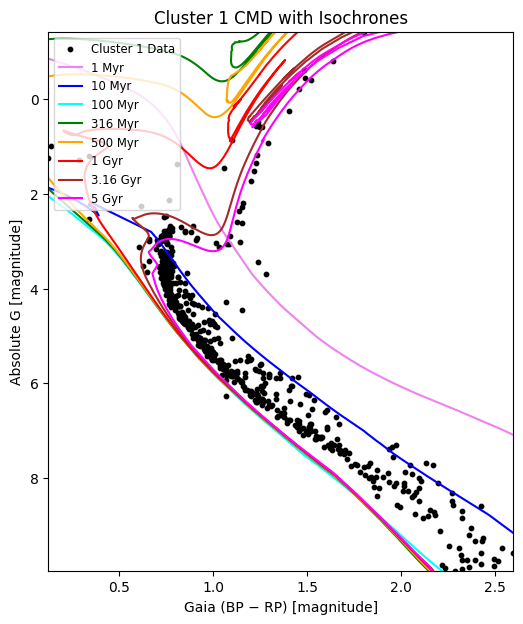

In [12]:
from astropy.io import ascii
import matplotlib.pyplot as plt

# read in your isochrones
iso_1Myr   = ascii.read('isochrone_solar_1Myr.csv')
iso_10Myr  = ascii.read('isochrone_solar_10Myr.csv')
iso_100Myr = ascii.read('isochrone_solar_100Myr.csv')
iso_316Myr = ascii.read('isochrone_solar_316Myr.csv')
iso_500Myr = ascii.read('isochrone_solar_500Myr.csv')
iso_1Gyr   = ascii.read('isochrone_solar_1Gyr.csv')
iso_3Gyr   = ascii.read('isochrone_solar_3.16Gyr.csv')
iso_5Gyr   = ascii.read('isochrone_solar_5Gyr.csv')

# plot cluster 1 CMD
plt.figure(figsize=(6,7))
plt.scatter(cluster1_BP_minus_RP, cluster1_absoluteG, s=10, color='black', label='Cluster 1 Data')

# overlay isochrones (different colors for ages)
plt.plot(iso_1Myr['Gaia_BP']-iso_1Myr['Gaia_RP'], iso_1Myr['Gaia_G'], color='violet', label='1 Myr')
plt.plot(iso_10Myr['Gaia_BP']-iso_10Myr['Gaia_RP'], iso_10Myr['Gaia_G'], color='blue', label='10 Myr')
plt.plot(iso_100Myr['Gaia_BP']-iso_100Myr['Gaia_RP'], iso_100Myr['Gaia_G'], color='cyan', label='100 Myr')
plt.plot(iso_316Myr['Gaia_BP']-iso_316Myr['Gaia_RP'], iso_316Myr['Gaia_G'], color='green', label='316 Myr')
plt.plot(iso_500Myr['Gaia_BP']-iso_500Myr['Gaia_RP'], iso_500Myr['Gaia_G'], color='orange', label='500 Myr')
plt.plot(iso_1Gyr['Gaia_BP']-iso_1Gyr['Gaia_RP'], iso_1Gyr['Gaia_G'], color='red', label='1 Gyr')
plt.plot(iso_3Gyr['Gaia_BP']-iso_3Gyr['Gaia_RP'], iso_3Gyr['Gaia_G'], color='brown', label='3.16 Gyr')
plt.plot(iso_5Gyr['Gaia_BP']-iso_5Gyr['Gaia_RP'], iso_5Gyr['Gaia_G'], color='magenta', label='5 Gyr')

# correct CMD orientation
plt.ylim(max(cluster1_absoluteG), min(cluster1_absoluteG))
plt.xlim(min(cluster1_BP_minus_RP), max(cluster1_BP_minus_RP))

# labels and legend
plt.xlabel("Gaia (BP − RP) [magnitude]")
plt.ylabel("Absolute G [magnitude]")
plt.title("Cluster 1 CMD with Isochrones")
plt.legend(loc='upper left', fontsize='small')

plt.show()


#### <span style="color:red">QUESTION 3E:</span> Discuss your Results from 3D. 

Describe in words your results from question 3D. What age to you estimate for both clusters? Describe what feature(s) you used to make this assessment. Comment on the uncertainty in your analysis. Roughly what mass range of stars are still on the main sequence for each of the clusters?

#### <span style="color:blue">I estimate that Cluster 1 has an age of approximately 200–300 Myr, while Cluster 2 is closer to 1–2 Gyr. This is based on the position of the main-sequence turn-off in each CMD. In Cluster 1, the turn-off occurs at a relatively bright, blue magnitude, consistent with the 100–316 Myr isochrones. In contrast, Cluster 2’s turn-off is at a lower luminosity and redder color, aligning more closely with the 1 Gyr or slightly older tracks. Uncertainty in this analysis arises from scatter in the observed data and the limited number of isochrones provided (spaced roughly logarithmically in age). The best-fit age is therefore only accurate to within roughly a factor of 2. The stars still on the main sequence in Cluster 1 likely have masses ≲ 3–4 M⊙, while those in Cluster 2 have masses ≲ 1.5–2 M⊙, consistent with stellar-evolution timescales that decrease strongly with increasing mass.</span>

#### <span style="color:red">QUESTION 3F:</span> Blue Stragglers

Are there any stars that appear to be "above" the main sequence turn off in either cluster? What are these and what are possible explanations for their existence? Reading section 13.3 might be helpful but you should then cite at least one addition source for ideas on their origins.

#### <span style="color:blue">In both clusters, a few stars appear above and to the left of the main-sequence turn-off, they are brighter and bluer than expected for the cluster’s age. These are identified as blue stragglers. Blue stragglers are thought to form when a star gains mass, either through stellar mergers in dense environments or mass transfer in close binary systems Such stars are observed in many open and globular clusters (see e.g. Leonard 1996, ApJ 470, 521; Sandage 1953, AJ 58, 61). Their presence in these CMDs is consistent with typical cluster dynamics and provides evidence that stellar interactions and binaries can significantly influence the late evolution of cluster populations.</span>